# Is het verdamping?

In dit experiment is er een verwarmingselement in een met water gevulde maatbeker gestopt. Elke minuut is de temperatuur van het water gemeten. Deze metingen zijn opgeslagen in [tempmetingen.csv](tempmetingen.csv).

Verder is gegeven dat: 
$m_{maatbeker} = 820.8 \mathrm{gr}$  
$m_{maatbeker + water, start} = 1292.9 \mathrm{gr}$  
$m_{maatbeker + water, eind} = 1274.9 \mathrm{gr}$

Het moge duidelijk zijn dat er water is 'verdwenen'. Ook is de eindtemperatuur van het water niet gelijk aan een proces waarbij verdamping en eventuele warmteverliezen niet meegenomen worden. 

```{exercise}
Onderzoek het proces door:
1. De plot van de metingen te maken, inclusief een verwachte trendlijn voor de temperatuur van het water als al de toegevoerde warmte gaat zitten in het water.
2. Bepaal of de totale hoeveelheid toegevoegde energie correspondeert met de opwarming en verdamping van het water, geef daarbij de aannames die je doet.
3. Geef aanbevelingen voor een verbetering van het experiment om (nog) beter het thermodynamische proces te kunnen onderzoeken en beschrijven.
```

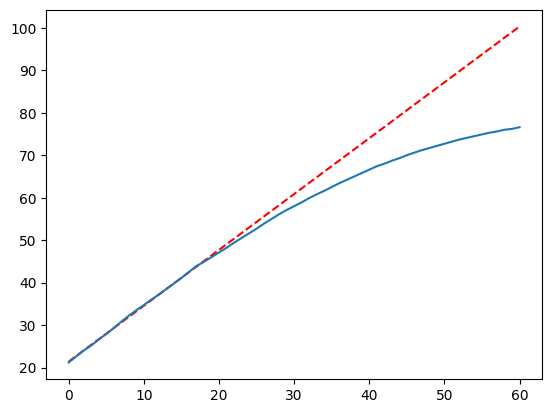

Het verschil tussen de hoeveelheid energie is: 4335.841197535032


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def function_fit(x,a,b):
    return a*x+b

massa_water_eind = 1274.9 - 820.8



data = np.genfromtxt('metingen/tempmetingen.csv', delimiter=';')

t = data[:,0]
T = data[:,1]

val, cov = curve_fit(function_fit, t[0:20], T[0:20])

x_test = np.linspace(min(t),max(t), 1000)
y_fit = function_fit(x_test,*val)
plt.plot(x_test, y_fit, 'r--')


plt.plot(t,T)
plt.show()

verschil_vanaf_fit = y_fit[999] - T[60] # verschil van 23 graden tov verwacht zonder verdamping
m_water_verloren = 1292.9 - 1274.9 #g


L_water = 2260 #J/g
c_water = 4.18 #J/(gK)

Q_verdamping = m_water_verloren * L_water
Q_opwarming = verschil_vanaf_fit * c_water * massa_water_eind

print("Het verschil tussen de hoeveelheid energie is:", Q_opwarming - Q_verdamping)
print("Dit verschil is hoogstwaarschijnlijk te verklaren door het warmteverlies naar de omgeving.")